In [22]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns; sns.set()

 # [gyro_x, gyro_y, gyro_z, accel_x, accel_y, accel_z]

In [23]:
wave_data = []
wave_data.append(pd.read_csv('./spin/data_1_np.csv'))
wave_data[0]




,-2.673339999999999961e+01,-3.540039000000000158e+00,-2.685547000000000128e+00,-8.465576000000000212e-01,-2.382813000000000014e-01,-5.400390999999999941e-01
0,-65.42969,-7.568359,-1.770019,-0.839477,-0.214844,-0.532959
1,-74.52393,-5.981445,-3.295898,-0.829346,-0.184082,-0.520874
2,-105.10250,-7.202148,0.854492,-0.812256,-0.196655,-0.535523
3,-125.42720,-9.521484,3.662109,-0.820557,-0.125122,-0.560791
4,-121.15480,-8.850098,1.098633,-0.836304,-0.133545,-0.511841
...,...,...,...,...,...,...
241,278.50340,-25.390620,-16.967770,-0.886475,0.341553,0.251099
242,694.09170,-27.465820,-42.297360,-0.863159,0.383545,1.072266
243,1662.17000,23.010250,-78.857420,-0.729981,1.400513,2.436157
244,1999.75600,-280.944800,-231.323200,-0.160889,1.483765,0.982910


In [24]:
gyro_x = wave_data[0].iloc[:, 0].values
gyro_y = wave_data[0].iloc[:, 1].values
gyro_z = wave_data[0].iloc[:, 2].values
accel_x = wave_data[0].iloc[:, 3].values
accel_y = wave_data[0].iloc[:, 4].values
accel_z = wave_data[0].iloc[:, 5].values


def check_data_pattern(d):
    x = np.linspace(0, len(d), len(d))
    y = d

    plt.plot(x, y, 'o', color='blue')


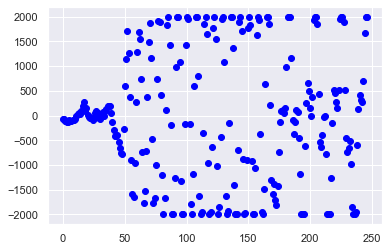

In [25]:
check_data_pattern(gyro_x)

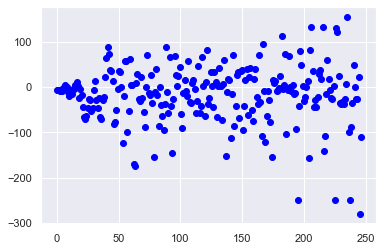

In [26]:
check_data_pattern(gyro_y)

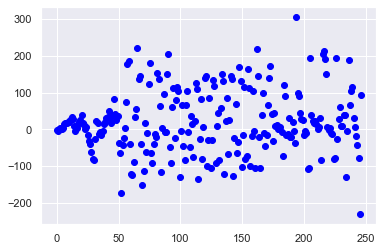

In [27]:
check_data_pattern(gyro_z)

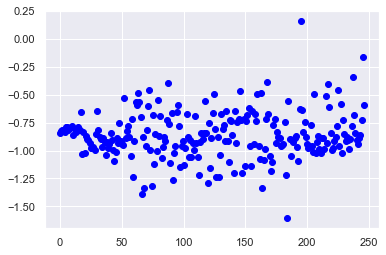

In [28]:
check_data_pattern(accel_x)

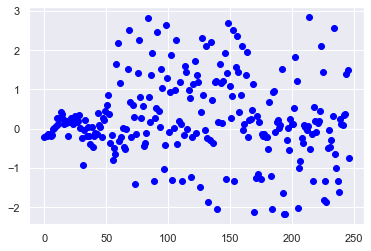

In [29]:
check_data_pattern(accel_y)

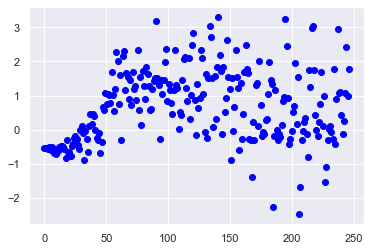

In [30]:
check_data_pattern(accel_z)

In [31]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


def train_model(vertical_swipe, horizontal_swish):
     vertical_swipe   = np.asarray(vertical_swipe)
     horizontal_swish = np.asarray(horizontal_swish)
     X = np.append(vertical_swipe, horizontal_swish, axis=0)
     y = np.append(np.zeros(vertical_swipe.shape[0]), np.ones(horizontal_swish.shape[0]))
     model = KNeighborsClassifier(n_neighbors=15)
     model.fit(X,y)
     
     return model; 

def predict_model(model,data):
     data = np.array(data)
     if np.any(np.isnan(data)) or np.any(np.isinf(data)):
          return 0
     return model.predict(data.reshape(1,-1))[0]

def run_training_and_prediction(vertical_swipe, horizontal_swish, data):
     model = train_model(vertical_swipe, horizontal_swish)
     return predict_model(model, data)